In [1]:
import os
import glob
import datetime
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import pandas as pd
import scipy
from scipy.optimize import curve_fit

import pickle

import seaborn as sns
sns.set()

import gsf_ims_fitness.fitness as fitness

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
main_directory = os.getcwd()
main_directory

'C:\\Users\\djross\\Documents\\Sequencing_data_downloads\\2019-10-16_IPTG_Select-DNA-5-plates'

Importing BarSeq count data and plotting histogram for thresholding for experiment: 2019-10-16_IPTG_Select-DNA-5-plate


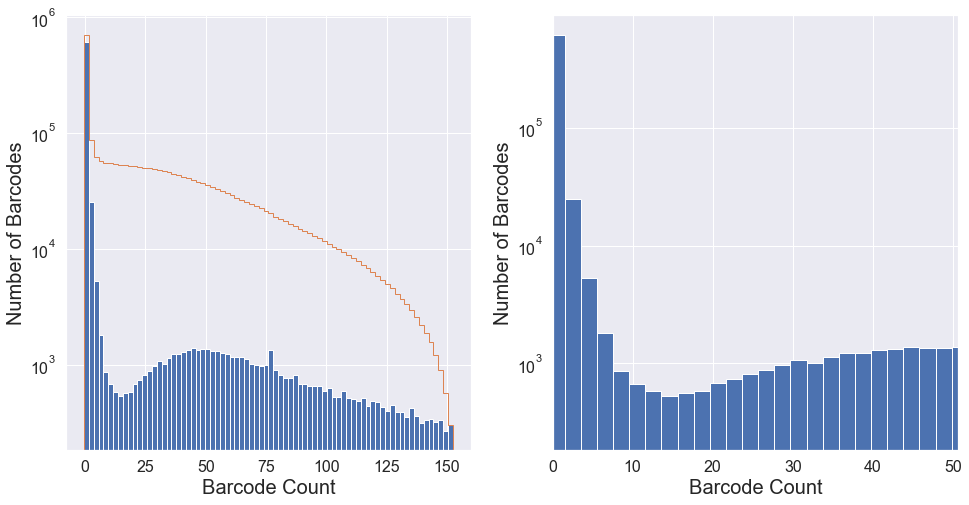

In [3]:
barcode_frame = fitness.bar_seq_threshold_plot(main_directory)

Barcode frequency cutoff: 16


,RS_name,forward_BC,reverse_BC,total_counts
1,AO-B,CCTAGGACCTTCAAGATGTAAGATGTCAATTCGTAAC,TATTCGATATTGAACATCAATAGTAGGAACTACTACT,298999


,RS_name,forward_BC,reverse_BC,total_counts
2,AO-E,TTTGTAATTTCTGAACTTGAAGATAACATCTCATATC,AATTGGACCTCAAAGGTCCTTTTTTTAACCTCTGACA,274675


,RS_name,forward_BC,reverse_BC,total_counts
1429,RS01,TATGGCAACTGTCAGATCTAATTTTGCATATGATACA,AATTGCAACTATCACGTGAGTACTATAACTTTGAATT,408


,RS_name,forward_BC,reverse_BC,total_counts
17331,RS04,CATTACAATTATGACATATCAACTCCTATGTCCCATC,TATGCCATCTAGTACGTACCTAATAGTAAATTATAGC,133


,RS_name,forward_BC,reverse_BC,total_counts
37166,RS05,ACTAAAACATCTCAATTAGCAACTAATACCTCTAATC,CCTTTTAAGTTCGACGTTCATTCTTCGAGATCTTATG,70


,RS_name,forward_BC,reverse_BC,total_counts
14349,RS06,AATTGTATGTCGTAGTTGCAATGTGTGATGTTCGAAA,CTTAATAGCTTCAAGTTCCCTCCTAGTACATAATACC,151


,RS_name,forward_BC,reverse_BC,total_counts
1188,RS10,ACTCTAAGCTCCTAAATTGAAGTTCTGACATGTAACG,GGTCTTAGGTGTCATGTTTGTTGTTCCATTTTTAACG,431


,RS_name,forward_BC,reverse_BC,total_counts


,RS_name,forward_BC,reverse_BC,total_counts
19900,RS14,TTTTTAAAATATTAAATAAGAGTTTCTACATCAAACG,CATATAATTTCGAAGCTGTATCATTGCAAATGCCAGA,121


,RS_name,forward_BC,reverse_BC,total_counts
26261,RS15,CTTGAGAATTTTTACCTTTCAACTGGTACGTTTGATT,CCTGTTAAGTGCAAGTTCTATCCTGGTAGTTGAGACC,97


,RS_name,forward_BC,reverse_BC,total_counts
25719,RS16,CCTAGCAACTGCTAAGTCGTACGTACAATCTATAAAC,CATCATAATTTCGACATTCCTTATATCAGATGCGACT,99


,RS_name,forward_BC,reverse_BC,total_counts
6794,RS17,CTTCCGACCTATAATGTTTCATGTACTATGTCTTACC,TCTTTGAAGTGCTATTTGCGTCGTGTCAAATCATACC,225


,RS_name,forward_BC,reverse_BC,total_counts
26556,RS18,AGTCTGAGATATTATTTAGTATGTCCCATTTATTAAG,TGTAAAAATTGTCAACTGGTTCCTCAGAGTTATCAAC,96


,RS_name,forward_BC,reverse_BC,total_counts
29648,RS19,ACTCCTATCTAGTATGTCCTAGTTTAAACTTGAGACA,AGTAATATTTGCAACATGTTTCATTTGAACTCAAAAT,87


total reads: 8691311
reference sequence reads: 575592


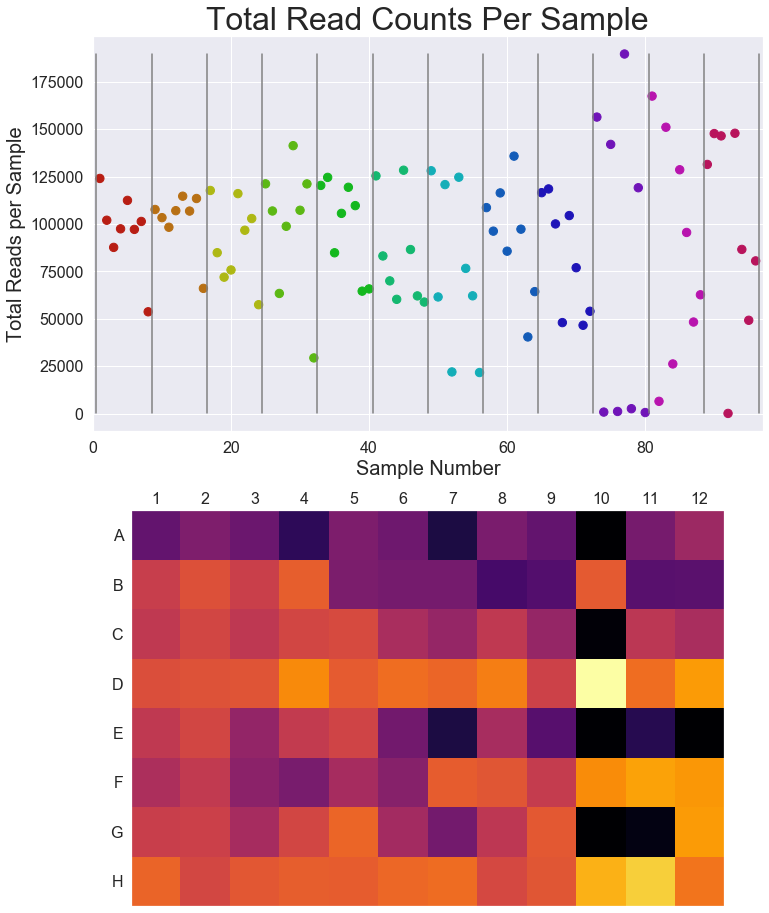

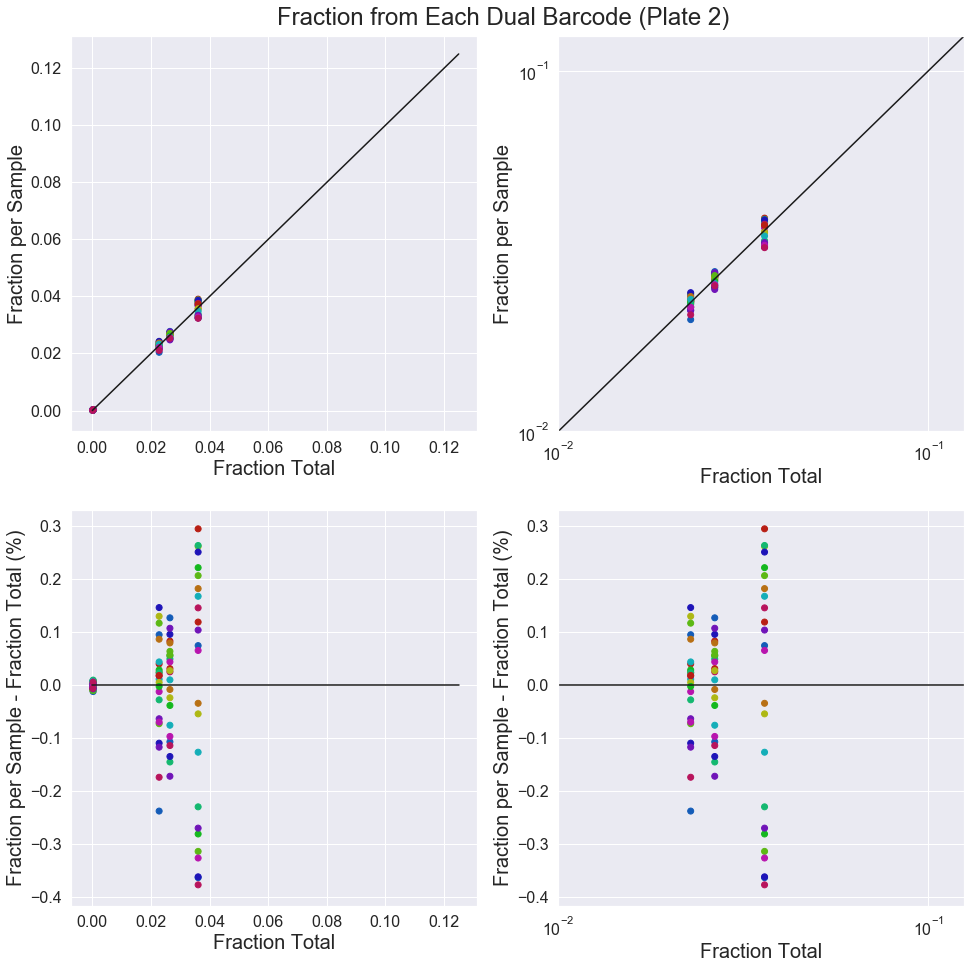

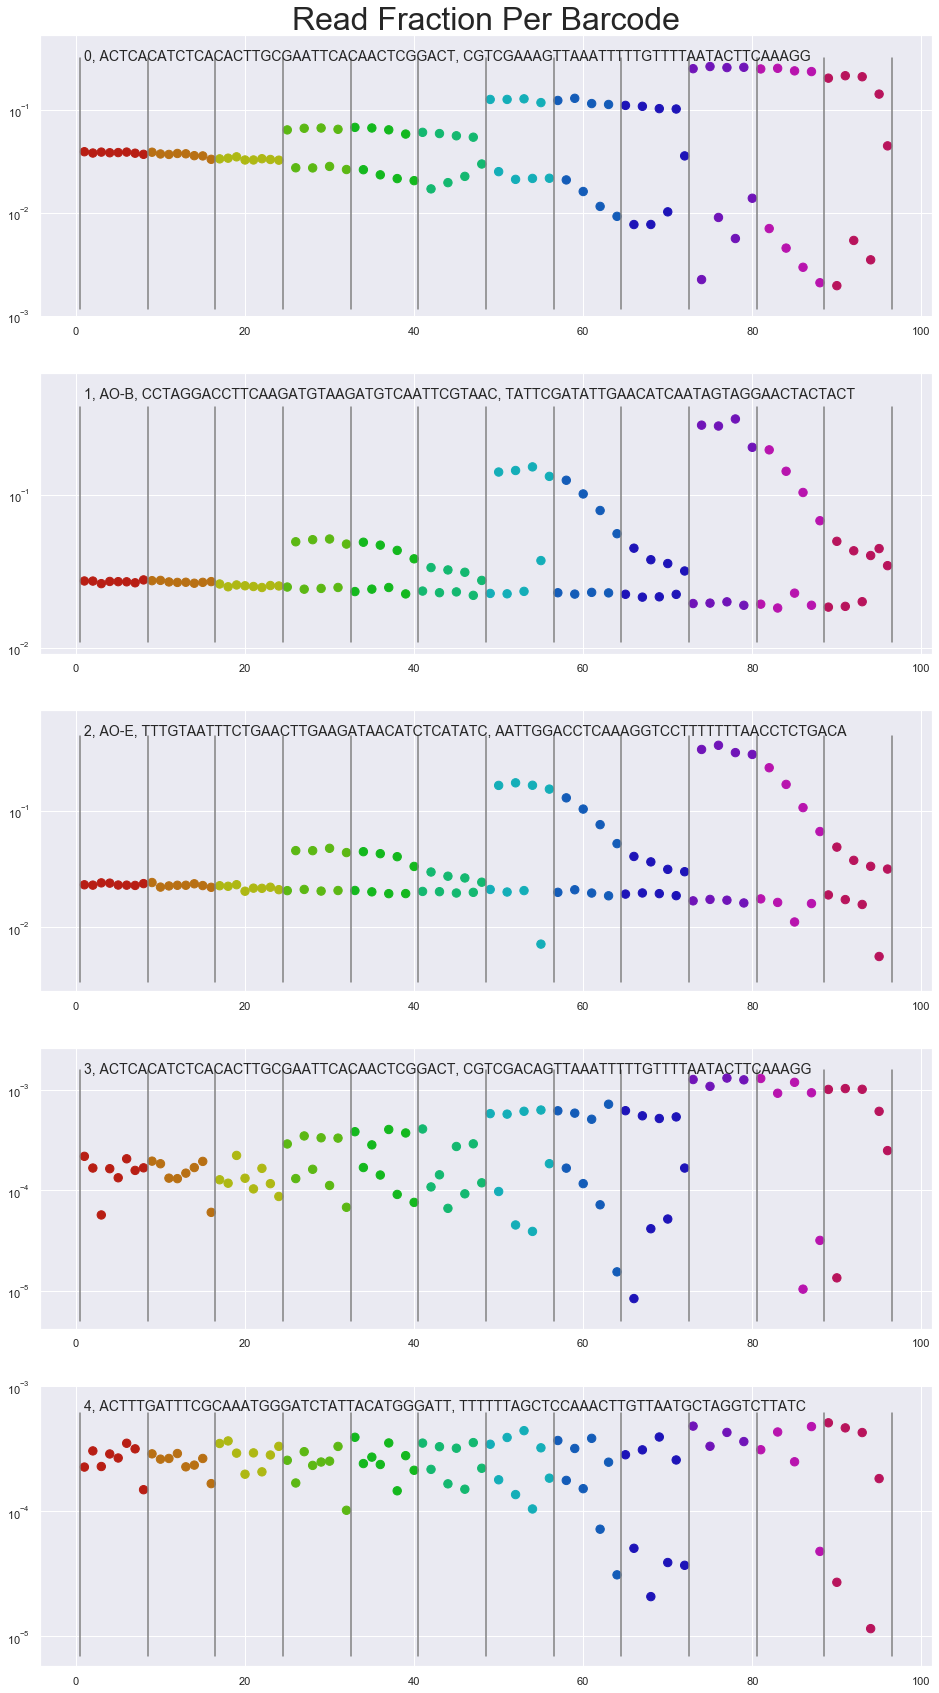

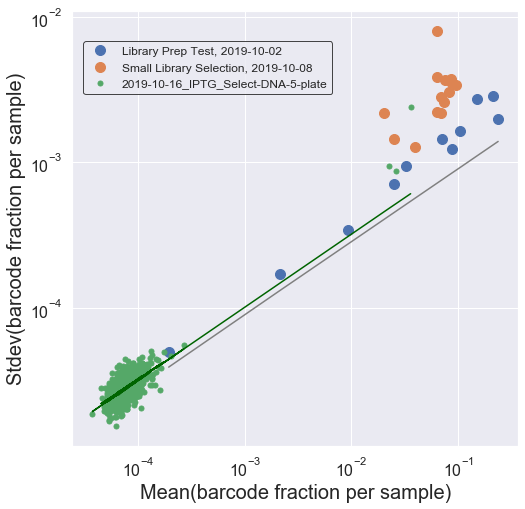

In [4]:
barcode_frame = fitness.bar_seq_quality_plots(barcode_frame, main_directory, num_to_plot=5, cutoff=16)

In [27]:
num_to_plot = 20

RS_count_frame = barcode_frame[barcode_frame["RS_name"]!=""]

barcode_fit_frame = barcode_frame.iloc[:num_to_plot]
barcode_fit_frame = pd.concat([barcode_fit_frame, RS_count_frame[2:]]).copy()

In [28]:
barcode_fit_frame = fitness.fit_barcode_fitness(barcode_fit_frame, main_directory)

Fitting to log(barcode ratios) to find fitness for each barcode in 2019-10-16_IPTG_Select-DNA-5-plates


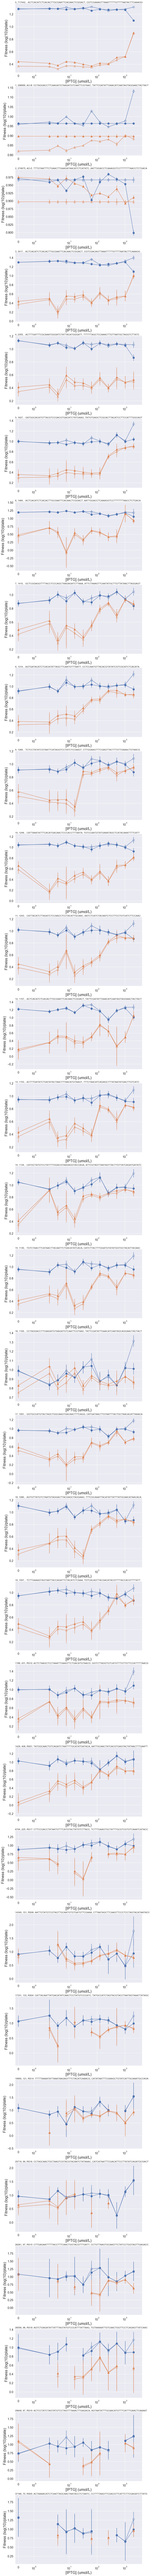

In [29]:
fitness.plot_barcode_fitness(barcode_fit_frame, main_directory)

In [30]:
barcode_fit_frame[:5]

,forward_BC,reverse_BC,A1,A2,A3,A4,A5,A6,A7,A8,...,read_count_0_5,read_count_tet_5,fitness_tet_estimate_b,fitness_0_estimate_b,fitness_tet_err_b,fitness_0_err_b,fitness_tet_estimate_e,fitness_0_estimate_e,fitness_tet_err_e,fitness_0_err_e
0,ACTCACATCTCACACTTGCGAATTCACAACTCGGACT,CGTCGAAAGTTAAATTTTTGTTTTAATACTTCAAAGG,4842,4156,3917,7704,8096,7548,16090,13336,...,"[39054, 37214, 48551, 30686, 41560, 38037, 305...","[2, 11, 15, 9, 46, 119, 282, 131, 289, 1, 302,...","[0.4416459144359846, 0.4139763471930851, 0.380...","[1.2859502040392194, 1.2856787302330939, 1.285...","[0.008145537599469586, 0.01083051238440823, 0....","[0.004000698992630225, 0.0045860270966064385, ...","[0.367599441667697, 0.36145684296903946, 0.324...","[1.2809761620920108, 1.2916861376341888, 1.285...","[0.0083005026913016, 0.01097879869560625, 0.00...","[0.004238785653905084, 0.0047729906535700535, ..."
1,CCTAGGACCTTCAAGATGTAAGATGTCAATTCGTAAC,TATTCGATATTGAACATCAATAGTAGGAACTACTACT,3386,2953,3070,3020,2802,2941,2899,2485,...,"[3041, 2778, 3782, 2256, 3224, 2745, 2924, 916...","[254, 344, 835, 133, 1288, 3736, 9879, 4239, 7...","[0.8972, 0.8972, 0.8972, 0.8972, 0.8972, 0.897...","[0.9637, 0.9637, 0.9637, 0.9637, 0.9637, 0.963...","[0.006187569977335987, 0.0073865029946495134, ...","[0.004868747757671547, 0.005537170191377184, 0...","[0.8196134194527296, 0.8244530701363401, 0.847...","[0.9587850309444814, 0.9706200833269543, 0.964...","[0.006242460398437272, 0.007294417915478165, 0...","[0.005061336397407815, 0.005685335800925078, 0..."
2,TTTGTAATTTCTGAACTTGAAGATAACATCTCATATC,AATTGGACCTCAAAGGTCCTTTTTTTAACCTCTGACA,2876,2611,2679,2503,2493,2549,2708,2170,...,"[2638, 2464, 3240, 1927, 2936, 2469, 1427, 773...","[302, 450, 850, 200, 1546, 4449, 10221, 4176, ...","[0.974786580393433, 0.9699469296633394, 0.9469...","[0.9715149694858964, 0.9596799165142846, 0.966...","[0.006242460429886845, 0.007294417850930005, 0...","[0.005061336376715675, 0.005685335787292543, 0...","[0.8972, 0.8972, 0.8972, 0.8972, 0.8972, 0.897...","[0.9666, 0.9666, 0.9666, 0.9666, 0.9666, 0.966...","[0.006285679335309737, 0.0071788547399928935, ...","[0.005246723039540131, 0.005829447982508226, 0..."
3,ACTCACATCTCACACTTGCGAATTCACAACTCGGACT,CGTCGACAGTTAAATTTTTGTTTTAATACTTCAAAGG,27,21,15,35,46,51,74,67,...,"[197, 153, 247, 149, 216, 139, 152, 45, 132, 1...","[0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 20]","[0.43671970960025946, 0.5005672570693294, 0.22...","[1.2958020021491015, 1.3152237909805073, 1.324...","[0.09927532186157616, 0.13881362126179717, 0.1...","[0.025186813902403977, 0.037672419563919285, 0...","[0.3697653899070572, 0.4755175037608227, 0.172...","[1.2960761907564944, 1.319022738401511, 1.3261...","[0.09929673244941409, 0.13884653785430903, 0.1...","[0.025236857743932264, 0.03773068827954104, 0...."
4,ACTTTGATTTCGCAAATGGGATCTATTACATGGGATT,TTTTTTAGCTCCAAACTTGTTAATGCTAGGTCTTATC,28,31,41,31,47,44,44,40,...,"[75, 47, 81, 43, 52, 65, 32, 23, 67, 68, 63, 9]","[0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 1, 0]","[0.41006715350776757, 0.4496185633497805, 0.31...","[1.1296318298607877, 1.0562881216324813, 1.090...","[0.07423751381344709, 0.10045846577609392, 0.0...","[0.02968839249967397, 0.03629741531958961, 0.0...","[0.3418554659396563, 0.4140052675028795, 0.265...","[1.1271087524718681, 1.0624876527682439, 1.091...","[0.07426333747304938, 0.10049092526477649, 0.0...","[0.02972414874201198, 0.03632274703087705, 0.0..."
